# Project title: Data Driven Analysis

# Team Name: Brand Builders
# Team Members: ASHWIN B, BLN WAJITH ALI, MOHD ZAID

# Importance Matrix Outline
# A1: Athlete Demographics (High Importance)
# A2: Sports and Events (High Importance)
# A3: Team and National Performance (Medium Importance)
# A4: Seasonality (Medium Importance, Consider Scope)

In [1]:
# importing the nessacery modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import networkx as nx
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx


# Data Cleaning Processing

In [2]:
df = pd.read_csv('athlete_events.csv')

In [3]:
#printing the data columns with the number of rows and
print(f'The DataSet has {df.shape[1]} columns with the headings of {df.columns} and contains {df.shape[0]} rows')

The DataSet has 15 columns with the headings of Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object') and contains 271116 rows


In [4]:
df.head(21)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [5]:
pd.isnull(df).sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of            ID   Name    Sex    Age  Height  Weight   Team    NOC  Games  \
0       False  False  False  False   False   False  False  False  False   
1       False  False  False  False   False   False  False  False  False   
2       False  False  False  False    True    True  False  False  False   
3       False  False  False  False    True    True  False  False  False   
4       False  False  False  False   False   False  False  False  False   
...       ...    ...    ...    ...     ...     ...    ...    ...    ...   
271111  False  False  False  False   False   False  False  False  False   
271112  False  False  False  False   False   False  False  False  False   
271113  False  False  False  False   False   False  False  False  False   
271114  False  False  False  False   False   False  False  False  False   
271115  False  False  False  False   False   False  False  False  False   

         Year  Season   City  Sport  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [7]:
df.replace('NA', np.nan, inplace=True)
# Handling the missing values with the mean values based on the events
for column in ['Age', 'Height', 'Weight']:
    df[column] = df.groupby('Event')[column].transform(lambda x: x.fillna(x.mean()))

df[['Age', 'Height', 'Weight']] = df[['Age', 'Height', 'Weight']].round(1)

In [8]:
df.head(21)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,177.5,73.1,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,182.5,95.6,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [9]:
# Calculating Body Mass Index (BMI)
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2
age_bins = [0, 18, 25, 35, max(df['Age']) + 1]  # Use maximum age from data
df['Age_Category'] = pd.cut(df['Age'], bins=age_bins, right=False, labels=['Junior', 'Young Adult', 'Adult', 'Midlife'])
print(df[['Age', 'Height', 'Weight', 'BMI', 'Age_Category']].head())


    Age  Height  Weight        BMI Age_Category
0  24.0   180.0    80.0  24.691358  Young Adult
1  23.0   170.0    60.0  20.761246  Young Adult
2  24.0   177.5    73.1  23.201746  Young Adult
3  34.0   182.5    95.6  28.703321        Adult
4  21.0   185.0    82.0  23.959094  Young Adult


# A1: Athlete Demographics (High Importance)

In [ ]:
"""1.	Descriptive Statistics: Calculate statistics for Age, Height, Weight, and BMI across genders."""

In [11]:
print(df.groupby('Sex')[['Age', 'Height', 'Weight', 'BMI']].describe())
def identify_outliers(group, column_name):
  Q1 = group[column_name].quantile(0.25)
  Q3 = group[column_name].quantile(0.75)
  IQR = Q3 - Q1
  return group[(group[column_name] < (Q1 - 1.5 * IQR)) | (group[column_name] > (Q3 + 1.5 * IQR))]

for sex in df['Sex'].unique():
  outliers = identify_outliers(df[df['Sex'] == sex], 'Age')
  if not outliers.empty:
    print(f"Age outliers for Sex {sex}:")
    print(outliers)
  outliers = identify_outliers(df[df['Sex'] == sex], 'Height')

          Age                                                       Height  \
        count       mean       std   min   25%   50%   75%   max     count   
Sex                                                                          
F     74522.0  23.749552  5.830052  11.0  20.0  23.0  27.0  74.0   74366.0   
M    196452.0  26.340794  6.456246  10.0  22.0  25.0  29.0  97.0  194667.0   

                 ... Weight              BMI                                  \
           mean  ...    75%    max     count       mean       std        min   
Sex              ...                                                           
F    167.703036  ...   65.0  167.0   74293.0  21.200296  2.379529  10.503834   
M    178.360405  ...   82.0  214.0  191915.0  23.585913  2.655817   8.360954   

                                                 
           25%        50%        75%        max  
Sex                                              
F    19.721037  20.957274  22.321429  51.789235  
M    22.

In [ ]:
"""2.	Visualization: Create visualizations to show distributions of these demographics for each sex."""

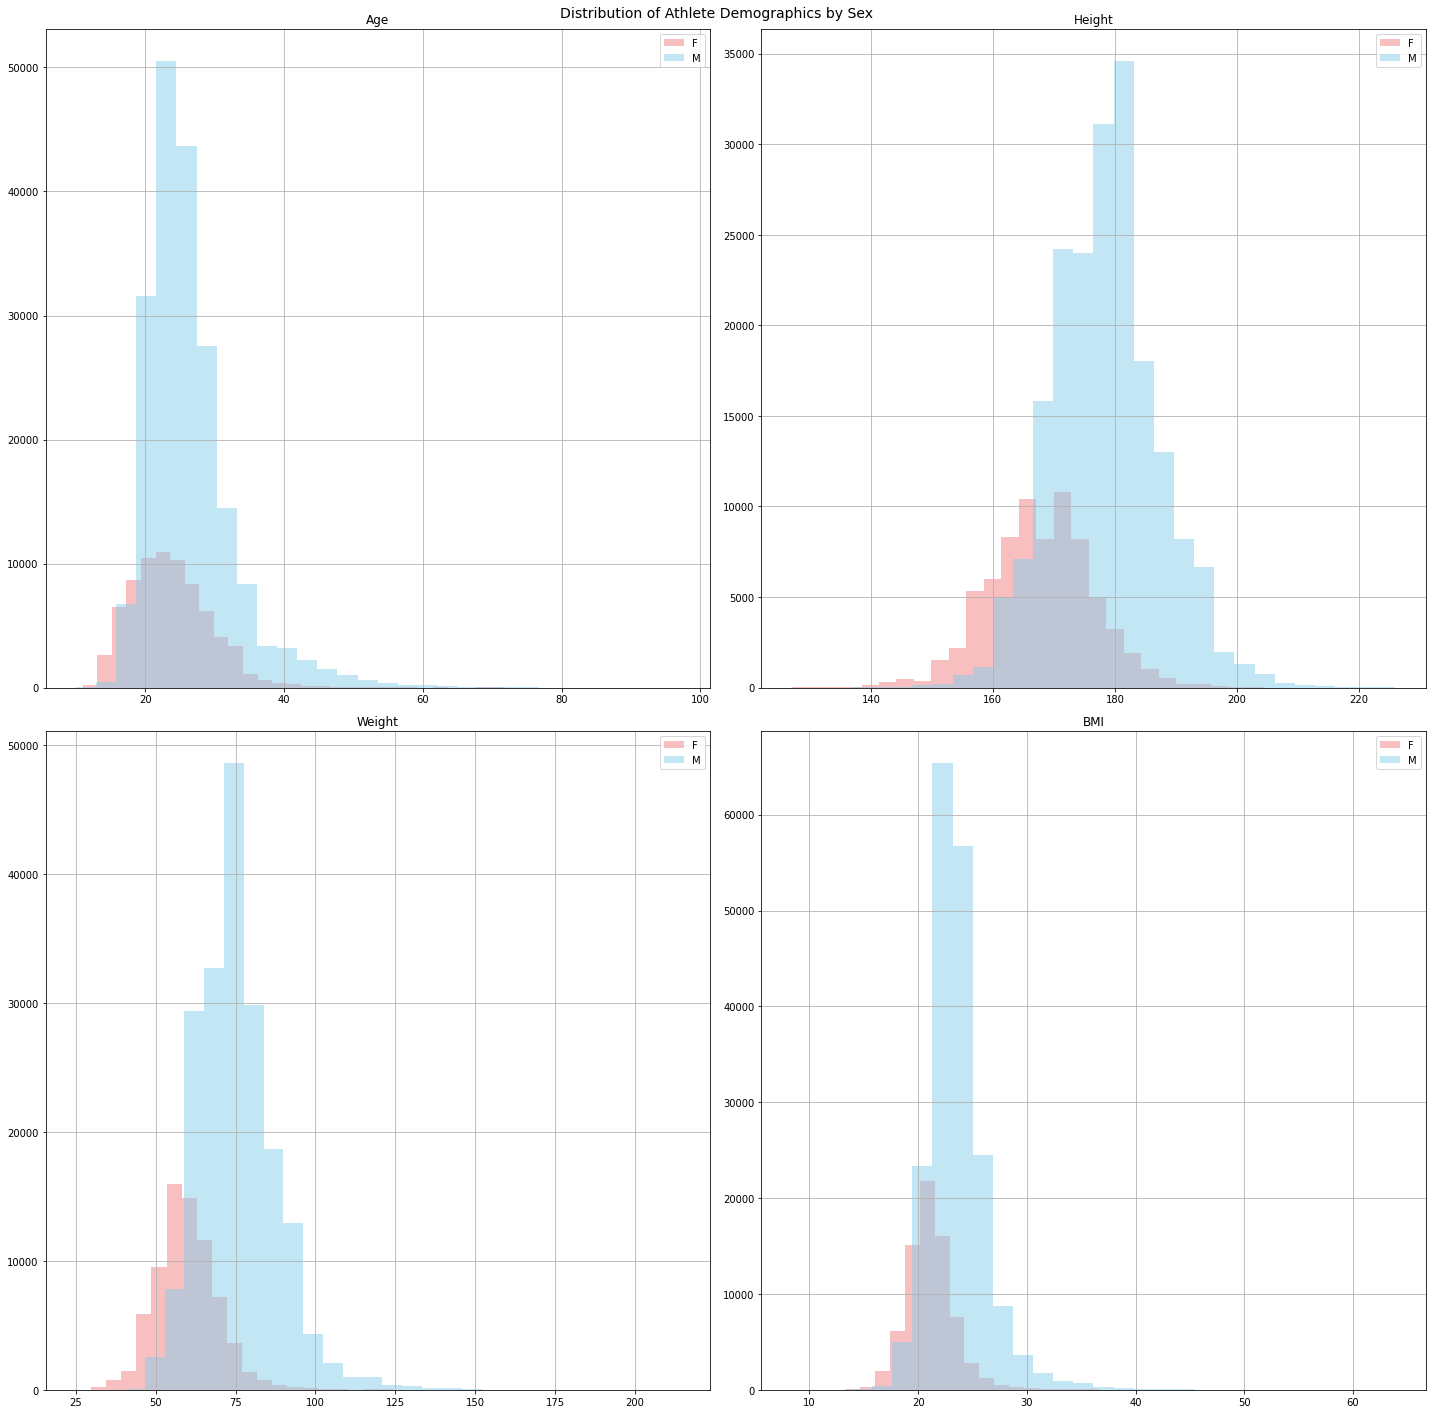

In [20]:
def calculate_bmi(height_cm, weight_kg):
    if pd.isna(height_cm) or pd.isna(weight_kg):
        return np.nan
    else:
        return weight_kg / (height_cm / 100) ** 2

df['BMI'] = df.apply(lambda row: calculate_bmi(row['Height'], row['Weight']), axis=1)
grouped_data = df.groupby('Sex')
colors = {'M': 'skyblue', 'F': 'lightcoral'}
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes_flat = axes.ravel()


features = ['Age', 'Height', 'Weight', 'BMI']
for idx, feature in enumerate(features):
    for sex, data in grouped_data:
        data[data['Sex'] == sex][feature].hist(bins=30, alpha=0.5, color=colors[sex], label=sex, ax=axes_flat[idx])
    axes_flat[idx].set_title(feature)
    axes_flat[idx].legend()

fig.suptitle('Distribution of Athlete Demographics by Sex', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
"""3.	Comparison: Compare demographics across teams, sports, NOCs, and medal winners vs. non-winners."""

In [26]:
# a function to label medal winners and non-winners
df_clean = df.dropna(subset=['Age', 'Height', 'Weight'])
def label_medal(row):
    if row['Medal'] == 'NA':
        return 'Non-Winner'
    else:
        return 'Winner'

C:\Users\Wajith Ali\AppData\Local\Temp\ipykernel_19664\662649830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Medal_Status'] = df_clean.apply(label_medal, axis=1)


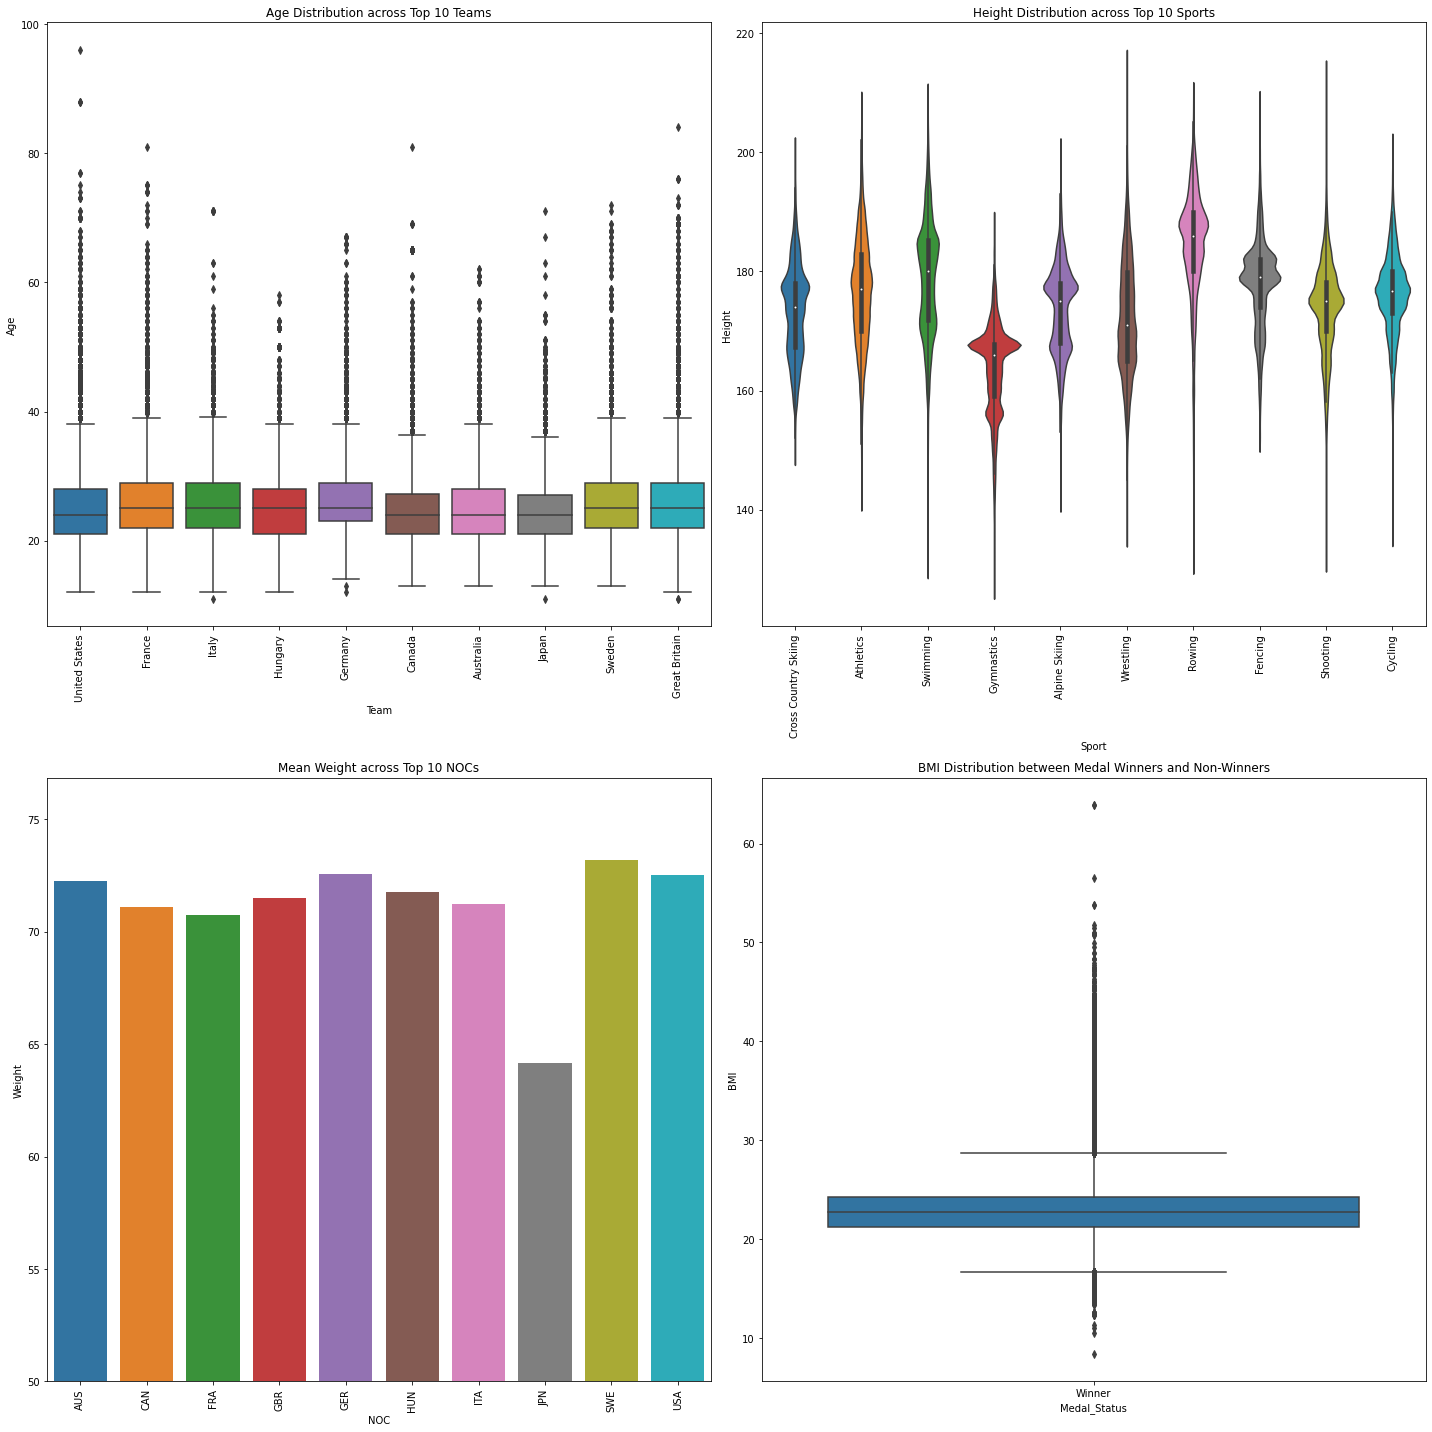

In [28]:

df_clean['Medal_Status'] = df_clean.apply(label_medal, axis=1)
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
teams_to_plot = df_clean['Team'].value_counts().nlargest(10).index
sns.boxplot(data=df_clean[df_clean['Team'].isin(teams_to_plot)], x='Team', y='Age', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution across Top 10 Teams')
axes[0, 0].tick_params(axis='x', rotation=90)

sports_to_plot = df_clean['Sport'].value_counts().nlargest(10).index
sns.violinplot(data=df_clean[df_clean['Sport'].isin(sports_to_plot)], x='Sport', y='Height', ax=axes[0, 1])
axes[0, 1].set_title('Height Distribution across Top 10 Sports')
axes[0, 1].tick_params(axis='x', rotation=90)

nocs_to_plot = df_clean['NOC'].value_counts().nlargest(10).index 
nocs_weight_mean = df_clean[df_clean['NOC'].isin(nocs_to_plot)].groupby('NOC')['Weight'].mean().reset_index()
sns.barplot(data=nocs_weight_mean, x='NOC', y='Weight', ax=axes[1, 0])
axes[1, 0].set_title('Mean Weight across Top 10 NOCs')
axes[1, 0].tick_params(axis='x', rotation=90)
axes[1, 0].set_ylim(50, None)  

# Comparison between medal winners and non-winners
sns.boxplot(data=df_clean, x='Medal_Status', y='BMI', ax=axes[1, 1])
axes[1, 1].set_title('BMI Distribution between Medal Winners and Non-Winners')
plt.tight_layout()
plt.show()

In [ ]:
"""4.	Correlation Analysis: Analyze correlations between demographics and medal success."""

In [29]:
df['BMI'] = df.apply(lambda row: calculate_bmi(row['Height'], row['Weight']), axis=1)

# Correlation matrix for demographics and medal success
correlation_matrix = df[['Age', 'Height', 'Weight', 'BMI', 'Medal']].corr()
print(correlation_matrix)

             Age    Height    Weight       BMI
Age     1.000000  0.103596  0.203250  0.236404
Height  0.103596  1.000000  0.794291  0.334758
Weight  0.203250  0.794291  1.000000  0.831862
BMI     0.236404  0.334758  0.831862  1.000000


C:\Users\Wajith Ali\AppData\Local\Temp\ipykernel_19664\3192614381.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['Age', 'Height', 'Weight', 'BMI', 'Medal']].corr()


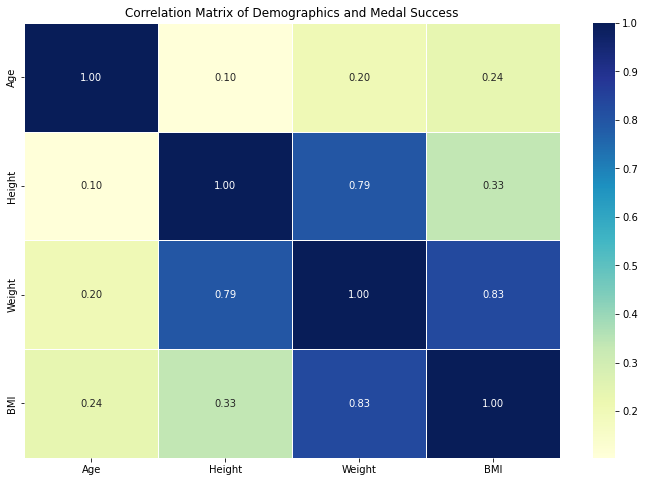

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Demographics and Medal Success')
plt.show()

# A2: Sports and Events (High Importance)

In [34]:
sports_counts = df['Sport'].value_counts()
events_counts = df['Event'].value_counts()

print("Most Popular Sport:")
print(sports_counts.nlargest(10))

print("\nMost Frequent Events:")
print(events_counts.nlargest(10)) 

Most Popular Sport:
Athletics               38624
Gymnastics              26707
Swimming                23195
Shooting                11448
Cycling                 10859
Fencing                 10735
Rowing                  10595
Cross Country Skiing     9133
Alpine Skiing            8829
Wrestling                7154
Name: Sport, dtype: int64

Most Frequent Events:
Football Men's Football                   5733
Ice Hockey Men's Ice Hockey               4762
Hockey Men's Hockey                       3958
Water Polo Men's Water Polo               3358
Basketball Men's Basketball               3280
Cycling Men's Road Race, Individual       2947
Gymnastics Men's Individual All-Around    2500
Rowing Men's Coxed Eights                 2423
Gymnastics Men's Team All-Around          2411
Handball Men's Handball                   2264
Name: Event, dtype: int64


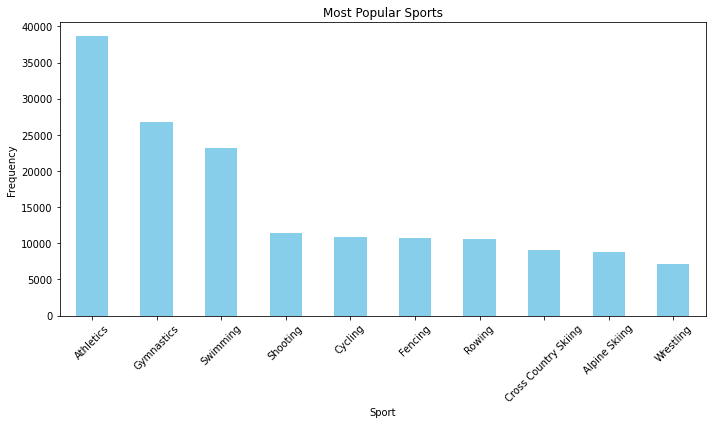

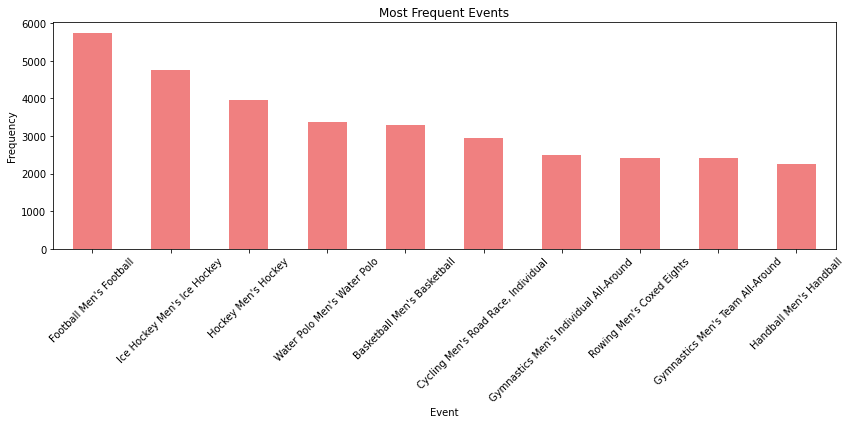

In [37]:
plt.figure(figsize=(10, 6))
sports_counts.nlargest(10).plot(kind='bar', color='skyblue')
plt.title('Most Popular Sports')
plt.xlabel('Sport')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
events_counts.nlargest(10).plot(kind='bar', color='lightcoral')
plt.title('Most Frequent Events')
plt.xlabel('Event')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
def identify_multisport_athletes(data):
    multisport_athletes = data.groupby('ID')['Sport'].nunique()
    return multisport_athletes[multisport_athletes > 1] 

multisport_df = identify_multisport_athletes(df.copy())

multisport_events = df[df['ID'].isin(multisport_df.index)][['ID', 'Event']].drop_duplicates()

print("Multisport Athletes and Their Respective Events:")
print(multisport_events)


Multisport Athletes and Their Respective Events:
            ID                                 Event
347        193           Water Polo Men's Water Polo
348        193   Swimming Men's 100 metres Freestyle
349        193  Swimming Men's 100 metres Backstroke
1351       766    Modern Pentathlon Men's Individual
1352       766          Modern Pentathlon Men's Team
...        ...                                   ...
270217  135182        Fencing Men's epee, Individual
270218  135182              Fencing Men's epee, Team
270602  135343                    Luge Men's Singles
270603  135343                   Bobsleigh Men's Two
270604  135343                  Bobsleigh Men's Four

[3278 rows x 2 columns]


In [128]:
def print_multisport_events_to_pdf(df, output_file):
    multisport_df = identify_multisport_athletes(df.copy())
    
    multisport_events = df[df['ID'].isin(multisport_df.index)].groupby(['NOC', 'ID'])['Event'].apply(', '.join).reset_index()
    
    with PdfPages(output_file) as pdf:
        num_pages = len(multisport_events) // 10 + 1
        
        for page_num in range(num_pages):
            start_idx = page_num * 10
            end_idx = min((page_num + 1) * 10, len(multisport_events))
            events_subset = multisport_events.iloc[start_idx:end_idx]
            
            fig, ax = plt.subplots(figsize=(8, 6))
        
            ax.axis('off')
            ax.text(0.5, 1.05, f"NOC: {events_subset['NOC'].iloc[0]}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=14)

            table = ax.table(cellText=events_subset[['ID', 'Event']].values, colLabels=['ID', 'Event'], loc='center', fontsize=12)
            table.auto_set_font_size(False)
            table.set_fontsize(12)
            table.scale(1, 2) 
            
            for (i, j), cell in table.get_celld().items():
                if i > 0 and j == 1:
                    cell.set_text_props(wrap=True)
            pdf.savefig(fig)
            plt.close()
output_file = 'multisport_events.pdf'
print_multisport_events_to_pdf(df, output_file)
print(f"Multisport events printed to '{output_file}' successfully.")

Multisport events printed to 'multisport_events.pdf' successfully.


In [64]:
if 'Medal' in df.columns and not df['Medal'].isnull().all():
    sport_input = input("Enter the name of the sport to analyze medal distribution: ")
    sport_df = df[df['Sport'] == sport_input]
    if not sport_df.empty:
        medal_counts_by_event = sport_df[sport_df['Medal'].notnull()]['Event'].value_counts()
        if not medal_counts_by_event.empty:
            print(f"\nMedal Distribution for {sport_input} by Events:")
            print(medal_counts_by_event.sort_values(ascending=False)) 
            fig = go.Figure(data=[go.Bar(x=medal_counts_by_event.index, y=medal_counts_by_event.values,
                                         text=medal_counts_by_event.index, marker=dict(color='blue'))])
            fig.update_layout(title=f'Medal Distribution for {sport_input} by Events',
                              xaxis=dict(title='Event'), yaxis=dict(title='Count'),
                              scene=dict(xaxis_title='Event', yaxis_title='Count', zaxis_title=''),
                              margin=dict(l=0, r=0, t=30, b=0))
            fig.show()
        else:
            print(f"No medals recorded for events in {sport_input}.")
    else:
        print(f"No data available for the specified sport: {sport_input}.")
else:
    print("No medals recorded in the dataset.")


Medal Distribution for Basketball by Events:
Basketball Men's Basketball      687
Basketball Women's Basketball    393
Name: Event, dtype: int64


In [10]:
# source : https://towardsdatascience.com/
athlete_sport_event_df = df[['ID', 'Sport', 'Event']]
athlete_sport_event_groups = athlete_sport_event_df.groupby('ID').agg({'Sport': lambda x: list(set(x)),
                                                                      'Event': lambda x: list(set(x))})
G = nx.Graph()
for sports in athlete_sport_event_groups['Sport']:
    G.add_nodes_from(sports, bipartite='sport')
for events in athlete_sport_event_groups['Event']:
    G.add_nodes_from(events, bipartite='event')
for idx, row in athlete_sport_event_groups.iterrows():
    athlete = idx
    sports = row['Sport']
    events = row['Event']
    for sport in sports:
        G.add_edge(athlete, sport)
    for event in events:
        G.add_edge(athlete, event)

sport_centrality = nx.degree_centrality(G)
event_centrality = nx.degree_centrality(G)
central_sports = sorted(sport_centrality, key=sport_centrality.get, reverse=True)[:5]
central_events = sorted(event_centrality, key=event_centrality.get, reverse=True)[:5]


print("Top 5 Central Sports:")
print(central_sports)
print("\nTop 5 Central Events:")
print(central_events)

# Draw the network graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Position nodes using Fruchterman-Reingold force-directed algorithm
nx.draw_networkx(G, pos, with_labels=True, node_size=100, font_size=8)
plt.title('Network Analysis of Athlete Co-occurrence in Sports and Events')
plt.show()

Top 5 Central Sports:
['Athletics', 'Swimming', 'Rowing', 'Football', 'Cycling']

Top 5 Central Events:
['Athletics', 'Swimming', 'Rowing', 'Football', 'Cycling']


KeyboardInterrupt: 

<Figure size 720x576 with 0 Axes>

# A3: Team and National Performance (Medium Importance)

In [12]:
def calculate_total_medals(df):
    total_medals = df.groupby('NOC')['Medal'].count().reset_index()
    total_medals.columns = ['NOC', 'Total_Medals']
    return total_medals

# Example usage:
total_medals_df = calculate_total_medals(df)
print(total_medals_df)

     NOC  Total_Medals
0    AFG             2
1    AHO             1
2    ALB             0
3    ALG            17
4    AND             0
..   ...           ...
225  YEM             0
226  YMD             0
227  YUG           390
228  ZAM             2
229  ZIM            22

[230 rows x 2 columns]


AFG and ZAM have won the same number of medals (2).


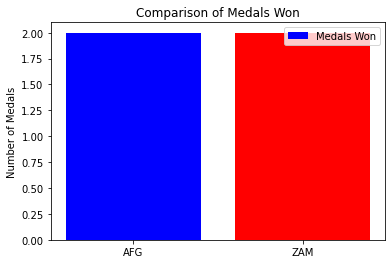

AFG has won more medals (2) compared to AHO (1).


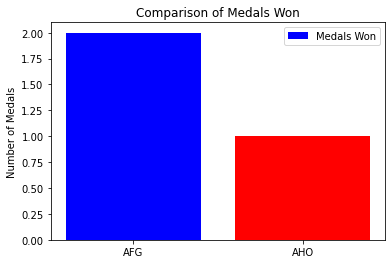

ZAM has won more medals (2) compared to AHO (1).


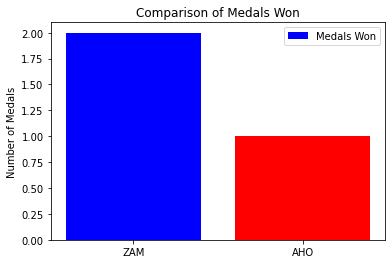

In [14]:
def compare_team_performance(df, *nocs):
    noc_medals = {}
    for noc in nocs:
        noc_medals[noc] = df[df['NOC'] == noc]['Medal'].count()
    
    sorted_nocs = sorted(noc_medals.items(), key=lambda x: x[1], reverse=True)
    
    for i in range(len(sorted_nocs)):
        for j in range(i+1, len(sorted_nocs)):
            noc_1, medals_1 = sorted_nocs[i]
            noc_2, medals_2 = sorted_nocs[j]
            if medals_1 > medals_2:
                print(f"{noc_1} has won more medals ({medals_1}) compared to {noc_2} ({medals_2}).")
            elif medals_1 < medals_2:
                print(f"{noc_2} has won more medals ({medals_2}) compared to {noc_1} ({medals_1}).")
            else:
                print(f"{noc_1} and {noc_2} have won the same number of medals ({medals_1}).")
            plot_comparison_bar_chart(noc_1, medals_1, noc_2, medals_2)

def plot_comparison_bar_chart(noc_1, noc_1_medals, noc_2, noc_2_medals):
    fig, ax = plt.subplots()
    bars = ax.bar([noc_1, noc_2], [noc_1_medals, noc_2_medals], color=['blue', 'red'])
    ax.set_ylabel('Number of Medals')
    ax.set_title('Comparison of Medals Won')
    ax.set_xticks([noc_1, noc_2])
    ax.set_xticklabels([noc_1, noc_2])
    ax.legend(bars, ['Medals Won'])
    plt.show()

# Example usage:
nocs_input = input("Enter NOCs separated by comma: ").split(',')
compare_team_performance(df, *nocs_input)


In [16]:
def calculate_medal_success_rate(df):
    total_medals = df.groupby('NOC')['Medal'].count()
    total_participants = df.groupby('NOC')['ID'].nunique()
    medal_success_rate = (total_medals / total_participants).reset_index()
    medal_success_rate.columns = ['NOC', 'Medal_Success_Rate']
    return medal_success_rate

# Example usage:
medal_success_rate_df = calculate_medal_success_rate(df)
print(medal_success_rate_df.head)

<bound method NDFrame.head of      NOC  Medal_Success_Rate
0    AFG            0.019417
1    AHO            0.018182
2    ALB            0.000000
3    ALG            0.045576
4    AND            0.000000
..   ...                 ...
225  YEM            0.000000
226  YMD            0.000000
227  YUG            0.307087
228  ZAM            0.013793
229  ZIM            0.112245

[230 rows x 2 columns]>


In [18]:
def track_performance_over_time(df):
    performance_over_time = df.groupby(['Year', 'NOC'])['Medal'].count().unstack().fillna(0)
    return performance_over_time

# Example usage:
performance_over_time_df = track_performance_over_time(df)
print(performance_over_time_df)

NOC   AFG  AHO  ALB  ALG  AND  ANG  ANT   ANZ   ARG  ARM  ...  VIE  VIN  VNM  \
Year                                                      ...                  
1896  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  ...  0.0  0.0  0.0   
1900  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  ...  0.0  0.0  0.0   
1904  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  ...  0.0  0.0  0.0   
1906  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  ...  0.0  0.0  0.0   
1908  0.0  0.0  0.0  0.0  0.0  0.0  0.0  19.0   0.0  0.0  ...  0.0  0.0  0.0   
1912  0.0  0.0  0.0  0.0  0.0  0.0  0.0  10.0   0.0  0.0  ...  0.0  0.0  0.0   
1920  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  ...  0.0  0.0  0.0   
1924  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  10.0  0.0  ...  0.0  0.0  0.0   
1928  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  26.0  0.0  ...  0.0  0.0  0.0   
1932  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   4.0  0.0  ...  0.0  0.0  0.0   
1936  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

In [67]:
medal_data = df[df['Medal'].notnull()]
medal_counts = medal_data.groupby('NOC')['Medal'].count().reset_index()
medal_counts_ranked = medal_counts.sort_values(by='Medal', ascending=False)

print("Ranked Medal Counts by Team/NOC:")
print(medal_counts_ranked)

medal_counts_ranked.to_csv('medal_counts_ranked.csv', index=False)

Ranked Medal Counts by Team/NOC:
     NOC  Medal
141  USA   5637
139  URS   2503
49   GER   2165
46   GBR   2068
43   FRA   1777
..   ...    ...
114  SEN      1
127  TGA      1
36   ERI      1
29   CYP      1
63   IRQ      1

[149 rows x 2 columns]


In [101]:

df['Medal'] = df['Medal'].fillna(0)
def analyze_performance_over_time(data, sport, medal_kind):
  filtered_data = data[(data['Sport'] == sport) & (data['Medal'] == (medal_kind == 'Gold'))]
  games_data = filtered_data.groupby('Event')
  medal_counts = games_data.size()  
  return medal_counts

def generate_interactive_plot(data, sport, medal_kind):
  performance_over_time = analyze_performance_over_time(data.copy(), sport, medal_kind)
  fig = bar(performance_over_time, x=performance_over_time.index, title=f"Performance Over Time: {sport} ({medal_kind.capitalize()} Medals)")
  fig.update_layout(xaxis_title='Olympic Games', yaxis_title='Medal Count')
  fig.show() 


sport = input("Enter the sport to analyze: ")
medal_kind = input("Enter the medal kind (gold, silver, or bronze): ")
medal_kind = medal_kind.lower() 

generate_interactive_plot(df.copy(), sport, medal_kind)


C:\Users\Wajith Ali\AppData\Local\Temp\ipykernel_19664\3414289936.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [114]:

def convert_medal_values(medal_series):
  medal_dict = {'Gold': 1, 'Silver': 1, 'Bronze': 1, np.NAN: 0}
  return medal_series.replace(medal_dict)

# Function to calculate medal counts for groups (considering medal values)
def calculate_medal_counts(data, group_col):
  data['Medal Value'] = convert_medal_values(data['Medal'])  # Convert medal values
  grouped_data = data.groupby(group_col)
  medal_weights = grouped_data['Medal Value'].sum()  # Sum medal values per group
  return medal_weights

# Function to compare medal performance between NOCs using Plotly
def compare_noc_performance_interactive(data, noc_list, year):
  filtered_data = data[(data['NOC'].isin(noc_list)) & (data['Games'] == year)]  # Filter by NOCs and year
  noc_medals = calculate_medal_counts(filtered_data.copy(), 'NOC')
  fig = bar(noc_medals, x=noc_medals.index, title=f"Medal Performance Comparison ({year})")
  fig.update_layout(xaxis_title='NOC', yaxis_title='Total Medal Weight')
  fig.show()  # Display the interactive plot

# Get user input for NOCs (comma-separated)
nocs = input("Enter a comma-separated list of NOCs to compare (e.g., USA,CHN,GBR): ")
noc_list = nocs.strip().split(',')  # Split input into a list

# Get user input for year
year = input("Enter the year to compare (e.g., 2012 Summer): ")

# Compare medal performance
compare_noc_performance_interactive(df.copy(), noc_list, year)


# A4: Seasonality (Medium Importance, Consider Scope)

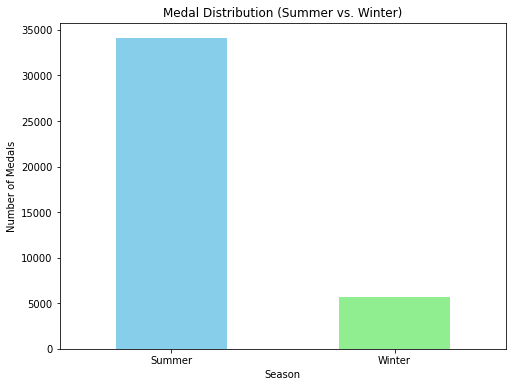

In [118]:

medal_counts_by_season = df.groupby('Season')['Medal'].count()
plt.figure(figsize=(8, 6))
medal_counts_by_season.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Medal Distribution (Summer vs. Winter)')
plt.xlabel('Season')
plt.ylabel('Number of Medals')
plt.xticks(rotation=0)
plt.show()

In [119]:
sport_counts = df['Sport'].value_counts()
threshold = 3
emerging_sports = sport_counts[sport_counts >= threshold]
print("Emerging Sports:")
print(emerging_sports)

Emerging Sports:
Athletics       38624
Gymnastics      26707
Swimming        23195
Shooting        11448
Cycling         10859
                ...  
Croquet            19
Motorboating       17
Racquets           12
Jeu De Paume       11
Roque               4
Name: Sport, Length: 64, dtype: int64
